In [1]:
pip install notebook pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
print(df.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [5]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd

# Encode target labels before splitting
y = y.map({'Presence': 1, 'Absence': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Update numeric and categorical features to match your dataset
numeric_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'FBS over 120']
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Sex', 'Chest pain type', 'EKG results', 'Exercise angina', 'Slope of ST']
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define all classifiers you want to compare
classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "ANN": MLPClassifier(max_iter=1000, random_state=42)
}

# Function to predict new data
def predict_heart_disease(model, data):
    predictions = model.predict(data)
    probabilities = model.predict_proba(data)
    return predictions, probabilities[:, 1]

model_pipelines = {}
reports = {}
for name, classifier in classifiers.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train)
    model_pipelines[name] = pipeline
    y_pred = pipeline.predict(X_test)
    reports[name] = (
        f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n"
        f"Precision: {precision_score(y_test, y_pred):.4f}\n"
        f"Recall: {recall_score(y_test, y_pred):.4f}\n"
        f"F1 Score: {f1_score(y_test, y_pred):.4f}\n\n"
        f"{classification_report(y_test, y_pred)}"
    )

# Sample patients
new_patients = pd.DataFrame([
    {
        'Age': 45,
        'BP': 120,
        'Cholesterol': 200,
        'Max HR': 160,
        'ST depression': 0.5,
        'FBS over 120': 0,
        'Sex': 0,
        'Chest pain type': 2,
        'EKG results': 0,
        'Exercise angina': 0,
        'Slope of ST': 1
    },
    {
        'Age': 60,
        'BP': 150,
        'Cholesterol': 300,
        'Max HR': 140,
        'ST depression': 2.0,
        'FBS over 120': 1,
        'Sex': 1,
        'Chest pain type': 4,
        'EKG results': 2,
        'Exercise angina': 1,
        'Slope of ST': 2
    }
])

# Collect all predictions for summary table
all_results = []
for name, pipeline in model_pipelines.items():
    preds = pipeline.predict(new_patients)
    probs = pipeline.predict_proba(new_patients)[:, 1]
    for i, (pred, prob) in enumerate(zip(preds, probs)):
        pred_label = "Heart Disease Present" if pred == 1 else "No Heart Disease"
        all_results.append({
            "Model": name,
            "Patient": f"Patient {i+1}",
            "Prediction": pred_label,
            "Probability": f"{prob:.4f}"
        })

results_df = pd.DataFrame(all_results)

# GUI
root = tk.Tk()
root.title("Heart Disease Multi-Model Results")
root.geometry("600x400")

# Table
tree = ttk.Treeview(root, columns=("Model", "Patient", "Prediction", "Probability"), show="headings", height=8)
for col in ("Model", "Patient", "Prediction", "Probability"):
    tree.heading(col, text=col)
    tree.column(col, width=140)
tree.pack(pady=20, fill=tk.X, padx=20)

# Insert data
for _, row in results_df.iterrows():
    tree.insert("", tk.END, values=tuple(row))

def show_reports():
    report_window = tk.Toplevel(root)
    report_window.title("Classification Reports")
    report_window.geometry("600x500")
    txt = scrolledtext.ScrolledText(report_window, wrap=tk.WORD, font=("Consolas", 10))
    txt.pack(expand=True, fill=tk.BOTH)
    for name, report in reports.items():
        txt.insert(tk.END, f"{'='*30}\n{name} CLASSIFICATION REPORT\n{'='*30}\n{report}\n\n")
    txt.config(state=tk.DISABLED)

# Button to show reports
tk.Button(root, text="Show Classification Reports", command=show_reports, bg="#2980b9", fg="white", width=30).pack(pady=10)

root.mainloop()


--- Tuning KNN ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Enhanced KNN best params: {'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 4}
Enhanced KNN CV accuracy: 0.90


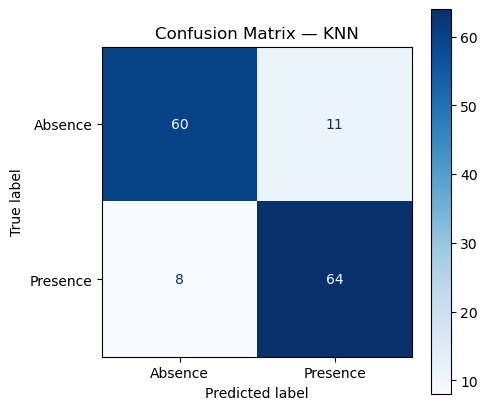


--- Tuning SVM ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Enhanced SVM best params: {'pca__n_components': 4, 'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Enhanced SVM CV accuracy: 0.91


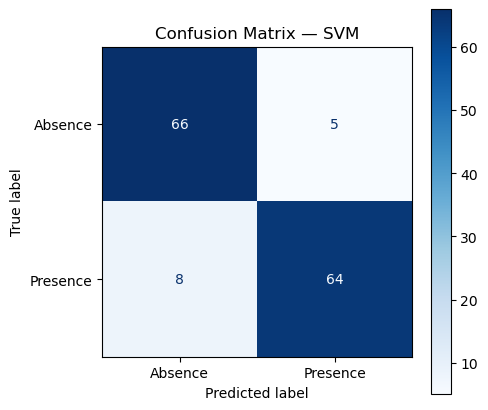


--- Tuning ANN ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Enhanced ANN best params: {'ann__activation': 'relu', 'ann__alpha': 0.0001, 'ann__hidden_layer_sizes': (50,), 'pca__n_components': 4}
Enhanced ANN CV accuracy: 0.90


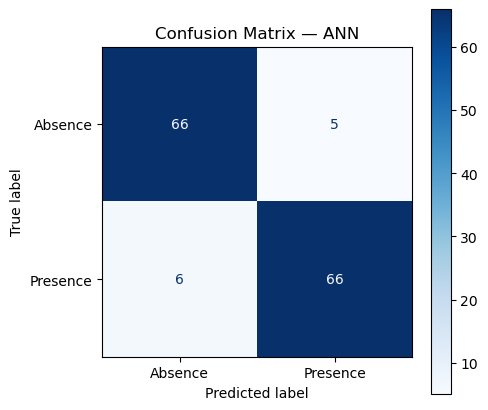

In [7]:
# 1) Imports
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2) Define three “enhanced” pipelines (preprocessor + PCA + classifier)
enhanced_pipelines = {
    'KNN': Pipeline([
        ('pre', preprocessor),
        ('pca', PCA()),
        ('knn', KNeighborsClassifier())
    ]),
    'SVM': Pipeline([
        ('pre', preprocessor),
        ('pca', PCA()),
        ('svm', SVC(probability=True))
    ]),
    'ANN': Pipeline([
        ('pre', preprocessor),
        ('pca', PCA()),
        ('ann', MLPClassifier(max_iter=1000, random_state=42))
    ]),
}

# 3) Set up corresponding hyperparameter grids
param_grids = {
    'KNN': {
        'pca__n_components': [2, 3, 4],
        'knn__n_neighbors': [3, 5, 7],
        'knn__p': [1, 2],
        'knn__weights': ['uniform', 'distance']
    },
    'SVM': {
        'pca__n_components': [2, 3, 4],
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf'],
        'svm__gamma': ['scale', 'auto']
    },
    'ANN': {
        'pca__n_components': [2, 3, 4],
        'ann__hidden_layer_sizes': [(50,), (100,), (50,50)],
        'ann__activation': ['tanh', 'relu'],
        'ann__alpha': [0.0001, 0.001]
    }
}

# 4) Loop over each model, run GridSearchCV, and report
for name, pipe in enhanced_pipelines.items():
    print(f"\n--- Tuning {name} ---")
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=5,
        verbose=2,
        n_jobs=-1,
        refit=True
    )
    grid.fit(X_train, y_train)
    
    # 5) Print summary
    print(f"\nEnhanced {name} best params: {grid.best_params_}")
    print(f"Enhanced {name} CV accuracy: {grid.best_score_:.2f}")
    
    # 6) Confusion matrix on test set
    y_pred = grid.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Absence', 'Presence'])
    fig, ax = plt.subplots(figsize=(5,5))
    disp.plot(ax=ax, cmap='Blues', colorbar=True)
    ax.set_title(f'Confusion Matrix — {name}')
    plt.show()

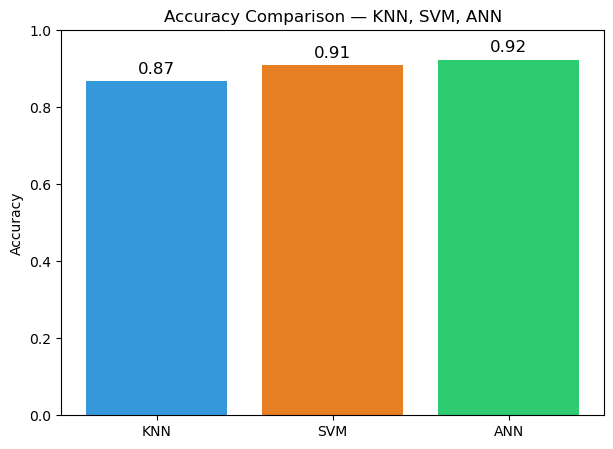

In [8]:
# Train and get best estimators
best_estimators = {}
for name, pipe in enhanced_pipelines.items():
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=5,
        verbose=0,
        n_jobs=-1,
        refit=True
    )
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_

# Collect accuracy scores for each model
accuracies = {}
for name, model in best_estimators.items():
    acc = model.score(X_test, y_test)
    accuracies[name] = acc

# Plot bar chart
plt.figure(figsize=(7,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['#3498db', '#e67e22', '#2ecc71'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison — KNN, SVM, ANN')
for i, (name, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()

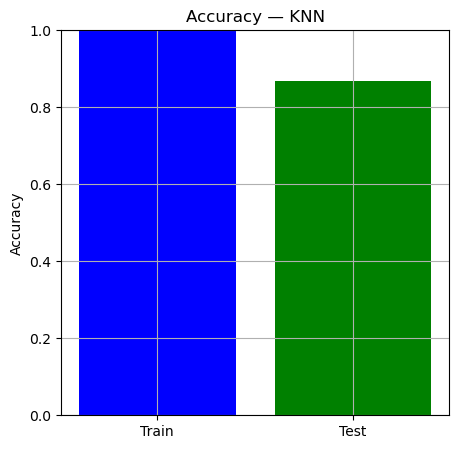

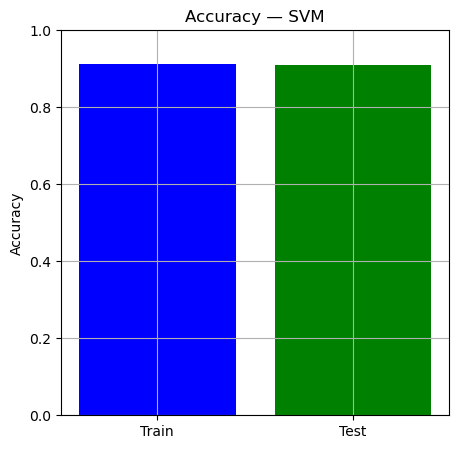

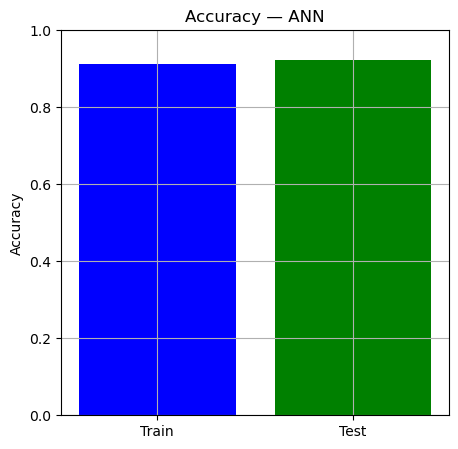

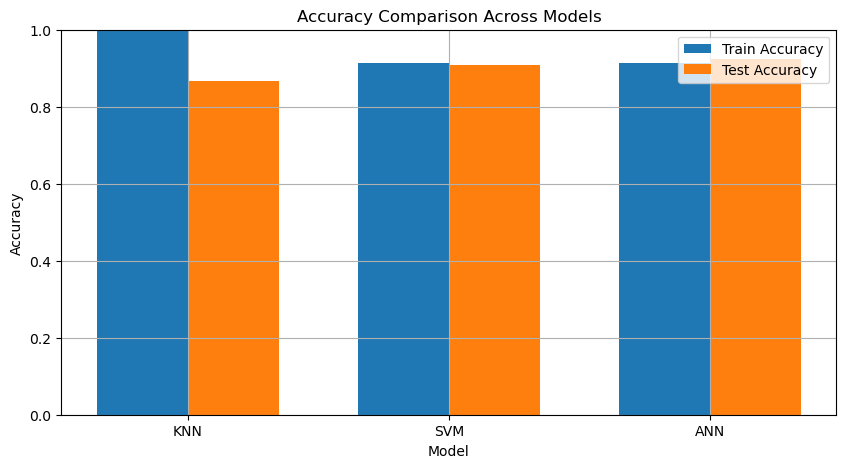

In [9]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to calculate loss and accuracy for a model
def calculate_loss_accuracy(model, X_train, y_train, X_test, y_test):
    # Get predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # For ANN, we can get loss from the model
    if hasattr(model, 'loss_curve_'):
        train_loss = model.loss_curve_
        return train_loss, train_accuracy, test_accuracy
    
    return None, train_accuracy, test_accuracy

# Store data for plots
model_data = {}

# Calculate and plot for each model
for name, model in best_estimators.items():
    loss_curve, train_acc, test_acc = calculate_loss_accuracy(model, X_train, y_train, X_test, y_test)
    model_data[name] = (loss_curve, train_acc, test_acc)
    
    # Plot for ANN (only model with loss curve)
    if name == 'ANN' and loss_curve is not None:
        plt.figure(figsize=(10, 5))
        
        # Loss curve
        plt.subplot(1, 2, 1)
        plt.plot(loss_curve, 'b-', label='Training Loss')
        plt.title(f'Loss Curve — {name}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        
        # Accuracy bar
        plt.subplot(1, 2, 2)
        plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'green'])
        plt.title(f'Accuracy — {name}')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
    else:
        # For KNN and SVM, only plot accuracy
        plt.figure(figsize=(5, 5))
        plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'green'])
        plt.title(f'Accuracy — {name}')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.grid(True)
        plt.show()

# Combined accuracy comparison
plt.figure(figsize=(10, 5))
x = np.arange(len(model_data))
width = 0.35

train_accs = [data[1] for data in model_data.values()]
test_accs = [data[2] for data in model_data.values()]

plt.bar(x - width/2, train_accs, width, label='Train Accuracy')
plt.bar(x + width/2, test_accs, width, label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Models')
plt.xticks(x, model_data.keys())
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

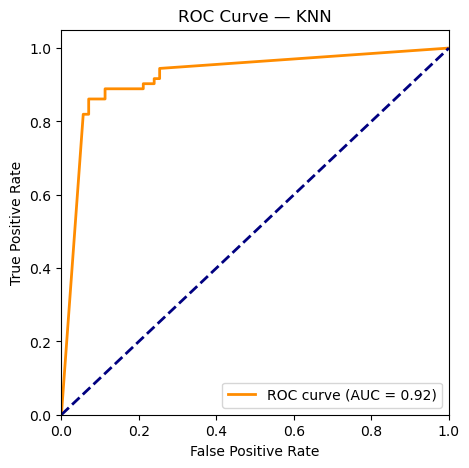

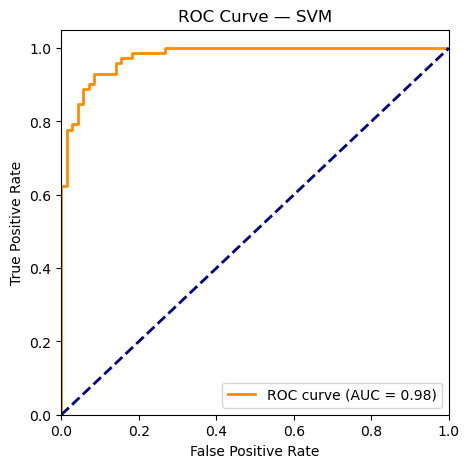

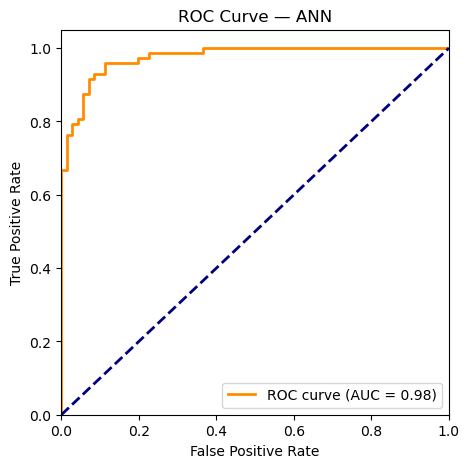

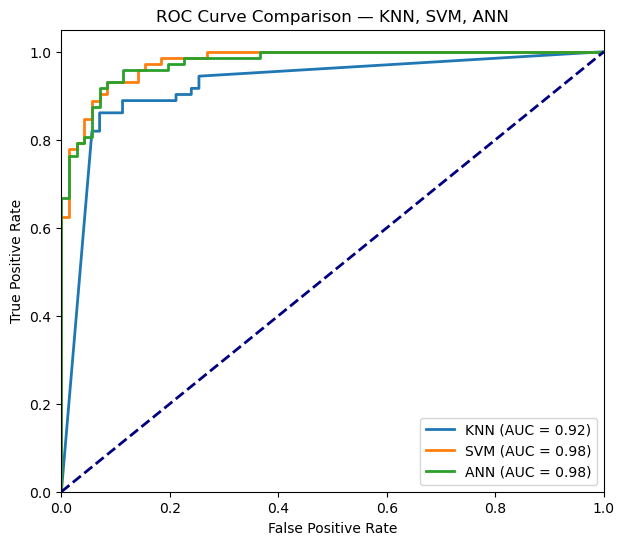

In [10]:

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define pipelines
enhanced_pipelines = {
    'KNN': Pipeline([
        ('pre', preprocessor),
        ('pca', PCA()),
        ('knn', KNeighborsClassifier())
    ]),
    'SVM': Pipeline([
        ('pre', preprocessor),
        ('pca', PCA()),
        ('svm', SVC(probability=True))
    ]),
    'ANN': Pipeline([
        ('pre', preprocessor),
        ('pca', PCA()),
        ('ann', MLPClassifier(max_iter=1000, random_state=42))
    ]),
}

# Hyperparameter grids
param_grids = {
    'KNN': {
        'pca__n_components': [2, 3, 4],
        'knn__n_neighbors': [3, 5, 7],
        'knn__p': [1, 2],
        'knn__weights': ['uniform', 'distance']
    },
    'SVM': {
        'pca__n_components': [2, 3, 4],
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf'],
        'svm__gamma': ['scale', 'auto']
    },
    'ANN': {
        'pca__n_components': [2, 3, 4],
        'ann__hidden_layer_sizes': [(50,), (100,), (50,50)],
        'ann__activation': ['tanh', 'relu'],
        'ann__alpha': [0.0001, 0.001]
    }
}

# Train, collect ROC data
roc_data = {}
best_estimators = {}

for name, pipe in enhanced_pipelines.items():
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=5,
        verbose=0,
        n_jobs=-1,
        refit=True
    )
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_
    y_score = grid.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)
    # Individual ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve — {name}')
    plt.legend(loc="lower right")
    plt.show()

# Combined ROC curve
plt.figure(figsize=(7, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison — KNN, SVM, ANN')
plt.legend(loc="lower right")
plt.show()



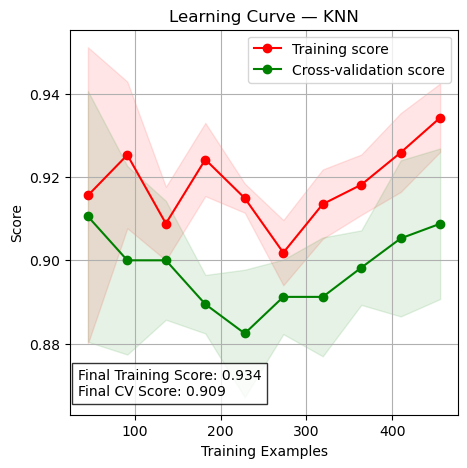

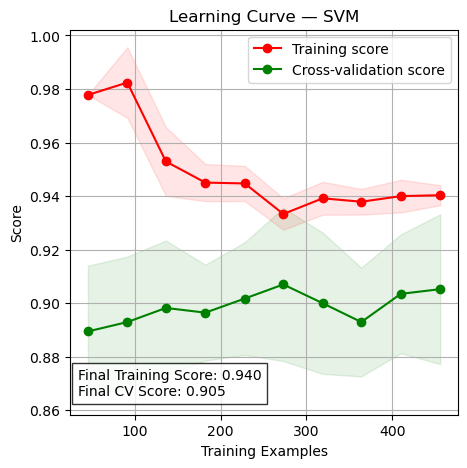

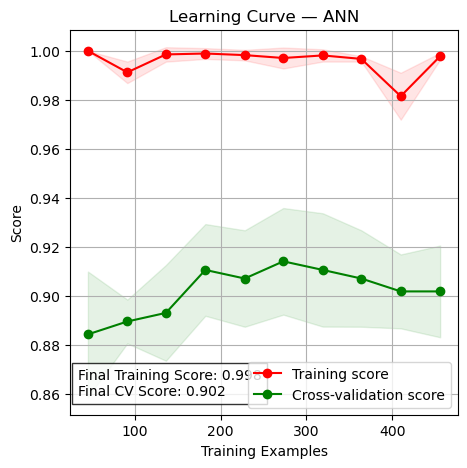

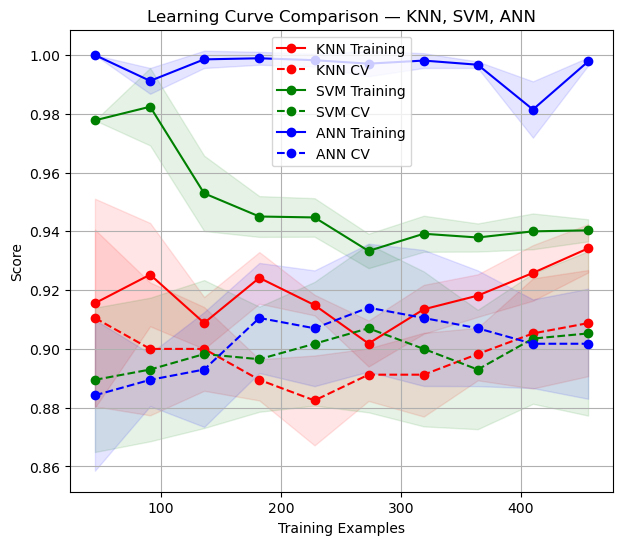

In [11]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the models to plot
models = {
    'KNN': enhanced_pipelines['KNN'],
    'SVM': enhanced_pipelines['SVM'],
    'ANN': enhanced_pipelines['ANN']
}

# Store learning curve data for combined plot
learning_curve_data = {}

# Plot individual learning curves
for name, model in models.items():
    # Calculate learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Store data for combined plot
    learning_curve_data[name] = (train_sizes, train_mean, val_mean, train_std, val_std)
    
    # Individual learning curve
    plt.figure(figsize=(5, 5))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, val_mean, 'o-', color='g', label='Cross-validation score')
    
    # Plot the standard deviation bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')
    
    # Customize the plot
    plt.title(f'Learning Curve — {name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Add final scores to the plot
    final_train_score = train_mean[-1]
    final_val_score = val_mean[-1]
    plt.text(0.02, 0.05, f'Final Training Score: {final_train_score:.3f}\nFinal CV Score: {final_val_score:.3f}',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

# Combined learning curve
plt.figure(figsize=(7, 6))
colors = ['r', 'g', 'b']
for i, (name, (train_sizes, train_mean, val_mean, train_std, val_std)) in enumerate(learning_curve_data.items()):
    color = colors[i]
    plt.plot(train_sizes, train_mean, 'o-', color=color, label=f'{name} Training')
    plt.plot(train_sizes, val_mean, 'o--', color=color, label=f'{name} CV')
    
    # Plot the standard deviation bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color=color)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color=color)

plt.title('Learning Curve Comparison — KNN, SVM, ANN')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

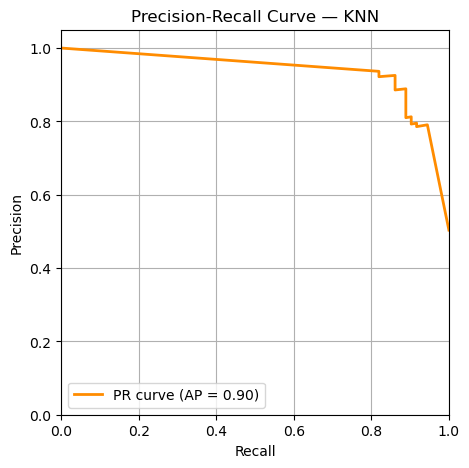

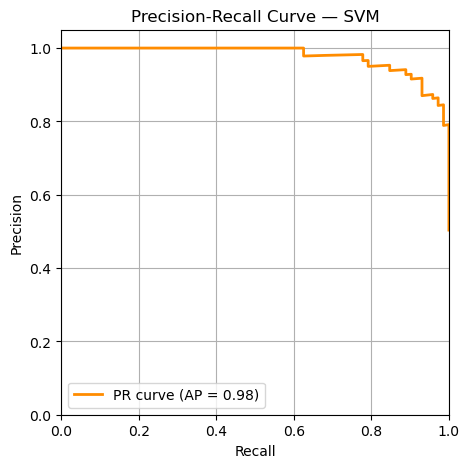

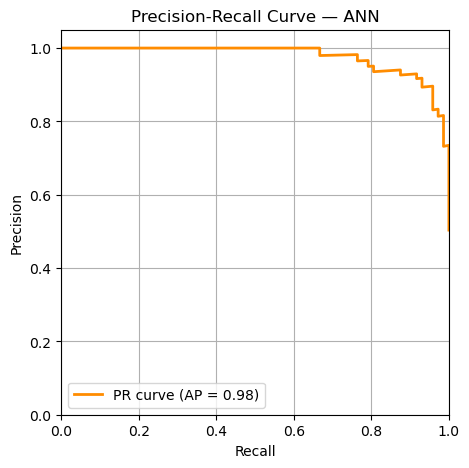

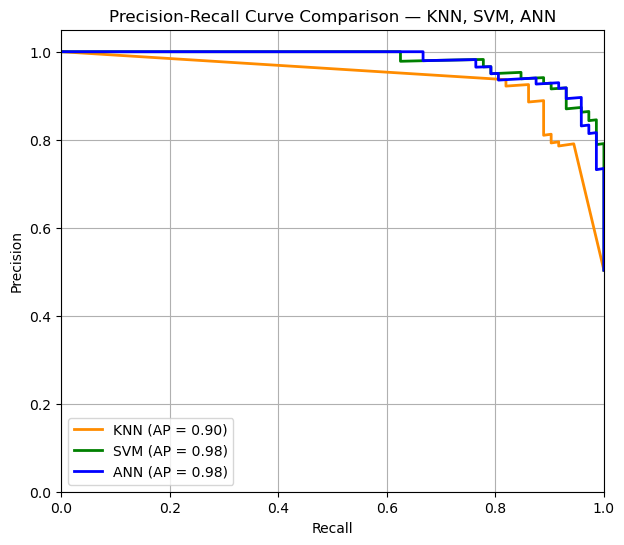

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Store PR curve data for combined plot
pr_data = {}

# Plot individual Precision-Recall curves
for name, model in best_estimators.items():
    # Get predicted probabilities
    y_score = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)
    
    # Store data for combined plot
    pr_data[name] = (precision, recall, average_precision)
    
    # Individual PR curve
    plt.figure(figsize=(5, 5))
    plt.plot(recall, precision, color='darkorange', lw=2, 
             label=f'PR curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall Curve — {name}')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

# Combined Precision-Recall curve
plt.figure(figsize=(7, 6))
colors = ['darkorange', 'green', 'blue']
for i, (name, (precision, recall, average_precision)) in enumerate(pr_data.items()):
    plt.plot(recall, precision, lw=2, color=colors[i], 
             label=f'{name} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve Comparison — KNN, SVM, ANN')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [13]:
# Train and select the best model
best_score = 0
best_model = None
best_name = None

for name, pipe in enhanced_pipelines.items():
    print(f"\n--- Tuning {name} ---")
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=5,
        verbose=0,
        n_jobs=-1,
        refit=True
    )
    grid.fit(X_train, y_train)
    print(f"{name} best params: {grid.best_params_}")
    print(f"{name} CV accuracy: {grid.best_score_:.2f}")
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_name = name

print(f"\nBest model: {best_name} with CV accuracy: {best_score:.2f}") 




--- Tuning KNN ---
KNN best params: {'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 4}
KNN CV accuracy: 0.90

--- Tuning SVM ---
SVM best params: {'pca__n_components': 4, 'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
SVM CV accuracy: 0.91

--- Tuning ANN ---
ANN best params: {'ann__activation': 'relu', 'ann__alpha': 0.0001, 'ann__hidden_layer_sizes': (50,), 'pca__n_components': 4}
ANN CV accuracy: 0.90

Best model: SVM with CV accuracy: 0.91


In [14]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd

default_values = {
    'Cholesterol': df['Cholesterol'].mean(),
    'Max HR': df['Max HR'].mean(),
    'ST depression': df['ST depression'].mean(),
    'FBS over 120': df['FBS over 120'].mode()[0],
    'EKG results': df['EKG results'].mode()[0],
    'Exercise angina': df['Exercise angina'].mode()[0],
    'Slope of ST': df['Slope of ST'].mode()[0],
    'Number of vessels fluro': df['Number of vessels fluro'].mode()[0],
    'Thallium': df['Thallium'].mode()[0],
}

def detailed_predictor_window():
    class DetailedPredictor:
        def __init__(self, root, best_estimators):
            self.root = root
            self.root.title("Heart Disease Predictor - Detailed")
            self.root.geometry("800x600")
            self.best_estimators = best_estimators
            self.main_frame = ttk.Frame(root, padding="10")
            self.main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))
            self.create_input_fields()
            self.predict_button = ttk.Button(self.main_frame, text="Get Prediction", command=self.get_prediction)
            self.predict_button.grid(row=len(self.fields), column=0, columnspan=2, pady=10)
            self.results_text = tk.Text(self.main_frame, height=10, width=60)
            self.results_text.grid(row=len(self.fields)+1, column=0, columnspan=2, pady=10)

        def create_input_fields(self):
            self.fields = {
                'Age': {'type': 'int', 'range': (1, 120)},
                'Sex': {'type': 'choice', 'options': ['Male', 'Female']},
                'Chest pain type': {'type': 'int', 'options': (1, 2, 3, 4)},
                'BP': {'type': 'int', 'range': (70, 300)},
                'Cholesterol': {'type': 'int', 'range': (126, 564)},
                'FBS over 120': {'type': 'choice', 'options': ['Yes', 'No']},
                'EKG results': {'type': 'int', 'options': (0, 1, 2)},
                'Max HR': {'type': 'int', 'range': (71, 202)},
                'Exercise angina': {'type': 'choice', 'options': ['Yes', 'No']},
                'ST depression': {'type': 'float', 'range': (0.0, 6.2)},
                'Slope of ST': {'type': 'choice', 'options': ['Upsloping', 'Flat', 'Downsloping']},
                'Number of vessels fluro': {'type': 'int', 'options': [0, 1, 2, 3]},
                'Thallium': {'type': 'int', 'options': [3, 6, 7]}
            }
            self.entries = {}
            for i, (field, config) in enumerate(self.fields.items()):
                ttk.Label(self.main_frame, text=field).grid(row=i, column=0, sticky=tk.W, pady=5)
                if config['type'] == 'choice':
                    var = tk.StringVar()
                    combobox = ttk.Combobox(self.main_frame, textvariable=var, values=config['options'])
                    combobox.grid(row=i, column=1, sticky=tk.W, pady=5)
                    self.entries[field] = combobox
                elif 'options' in config:
                    var = tk.StringVar()
                    combobox = ttk.Combobox(self.main_frame, textvariable=var, values=[str(opt) for opt in config['options']])
                    combobox.grid(row=i, column=1, sticky=tk.W, pady=5)
                    self.entries[field] = combobox
                else:
                    entry = ttk.Entry(self.main_frame)
                    entry.grid(row=i, column=1, sticky=tk.W, pady=5)
                    self.entries[field] = entry

        def get_prediction(self):
            try:
                input_data = {}
                for field, entry in self.entries.items():
                    config = self.fields[field]
                    value = entry.get()
                    # Validation for each field
                    if config['type'] == 'choice':
                        if field == 'Sex':
                            if value not in ['Male', 'Female']:
                                raise ValueError("Sex must be 'Male' or 'Female'.")
                            input_data[field] = 1 if value == 'Male' else 0
                        elif field == 'FBS over 120':
                            if value not in ['Yes', 'No']:
                                raise ValueError("FBS over 120 must be 'Yes' or 'No'.")
                            input_data[field] = 1 if value == 'Yes' else 0
                        elif field == 'Exercise angina':
                            if value not in ['Yes', 'No']:
                                raise ValueError("Exercise angina must be 'Yes' or 'No'.")
                            input_data[field] = 1 if value == 'Yes' else 0
                        else:
                            if value not in config['options']:
                                raise ValueError(f"{field} must be one of {config['options']}.")
                            # For other choices, use index or value as needed
                            if field == 'EKG results':
                                idx = config['options'].index(value)
                                if not (0 <= idx <= 2):
                                    raise ValueError("EKG results must be 0, 1, or 2.")
                                input_data[field] = idx
                            else:
                                input_data[field] = config['options'].index(value) + 1
                    elif 'options' in config:
                        if value not in [str(opt) for opt in config['options']]:
                            raise ValueError(f"{field} must be one of {config['options']}.")
                        input_data[field] = int(value)
                    else:
                        # Numeric fields
                        if config['type'] == 'int':
                            if not value.isdigit():
                                raise ValueError(f"{field} must be an integer.")
                            val = int(value)
                            if not (config['range'][0] <= val <= config['range'][1]):
                                raise ValueError(f"{field} must be between {config['range'][0]} and {config['range'][1]}.")
                            input_data[field] = val
                        elif config['type'] == 'float':
                            try:
                                val = float(value)
                            except ValueError:
                                raise ValueError(f"{field} must be a number.")
                            if not (config['range'][0] <= val <= config['range'][1]):
                                raise ValueError(f"{field} must be between {config['range'][0]} and {config['range'][1]}.")
                            input_data[field] = val

                input_df = pd.DataFrame([input_data])
                results = []
                for name, model in self.best_estimators.items():
                    prediction = model.predict(input_df)[0]
                    probability = model.predict_proba(input_df)[0][1]
                    results.append(f"{name}: {'Heart Disease Present' if prediction == 1 else 'No Heart Disease'} (Probability: {probability:.2%})")
                self.results_text.delete(1.0, tk.END)
                self.results_text.insert(tk.END, "Prediction Results:\n\n")
                for result in results:
                    self.results_text.insert(tk.END, result + "\n")
            except Exception as e:
                messagebox.showerror("Error", f"Please check your input values:\n{str(e)}")

    # You must pass best_estimators to this function
    root = tk.Tk()
    app = DetailedPredictor(root, best_estimators)
    root.mainloop()

def quick_predictor_window():
    X = pd.DataFrame(columns=['Age', 'BP', 'Sex', 'Chest pain type'] + list(default_values.keys()))
    def predict_heart_disease(model, df):
        if model is None:
            raise ValueError("best_model is None. Make sure you have run the model selection/training code first.")
        pred = model.predict(df)[0]
        prob = model.predict_proba(df)[0][1]
        pred_str = "heart disease present" if pred == 1 else "no heart disease"
        return pd.DataFrame({'Prediction': [pred_str], 'Probability': [prob]})
    def submit():
        try:
            # Validate Age
            age = age_entry.get()
            if not age.isdigit() or int(age) <= 0 or int(age) > 120:
                raise ValueError("Age must be a positive integer, and should be in range 0 - 120")
            # Validate BP
            bp = bp_entry.get()
            if not bp.isdigit() or int(bp) <= 70 or int(bp) > 300:
                raise ValueError("Resting Blood Pressure (BP) must be a positive integer.(range in 0 - 300)")
            # Validate Sex
            sex = sex_entry.get()
            if sex not in ['0', '1']:
                raise ValueError("Sex must be 0 (Female) or 1 (Male).")
            # Validate Chest pain type
            cp = cp_entry.get()
            if not cp.isdigit() or not (1 <= int(cp) <= 4):
                raise ValueError("Chest pain type must be an integer between 1 and 4.")

            user_data = {
                'Age': int(age),
                'BP': int(bp),
                'Sex': int(sex),
                'Chest pain type': int(cp)
            }
            for key in default_values:
                user_data[key] = default_values[key]
            user_df = pd.DataFrame([user_data])
            user_df = user_df[X.columns]
            user_result = predict_heart_disease(best_model, user_df)
            # Show prediction, probability, and model name
            result_text = (
                f"Prediction: {user_result['Prediction'].values[0]}\n"
                f"Probability: {user_result['Probability'].values[0]:.2f}\n"
                f"Model used: {best_name}"
            )
            messagebox.showinfo("Result", result_text)
            # Ask if user wants a more accurate result
            if messagebox.askyesno("More Accurate Result", "Would you like a more accurate result?"):
                root.destroy()
                detailed_predictor_window()
        except Exception as e:
            messagebox.showerror("Input Error", str(e))

    def clear_all():
        age_entry.delete(0, tk.END)
        bp_entry.delete(0, tk.END)
        sex_entry.delete(0, tk.END)
        cp_entry.delete(0, tk.END)

    root = tk.Tk()
    root.title("Heart Disease Predictor - Quick Check")
    root.geometry("460x300")
    label_font = ("Arial", 12)
    title_font = ("Arial", 16, "bold")
    title_label = tk.Label(root, text="Heart Disease Predictor", font=title_font, fg="#2c3e50")
    title_label.grid(row=0, column=0, columnspan=2, pady=(20, 10))
    tk.Label(root, text="Age:", font=label_font).grid(row=1, column=0, sticky="e", padx=10, pady=5)
    age_entry = tk.Entry(root, font=label_font)
    age_entry.grid(row=1, column=1, padx=10, pady=5)
    tk.Label(root, text="Resting Blood Pressure (BP):", font=label_font).grid(row=2, column=0, sticky="e", padx=10, pady=5)
    bp_entry = tk.Entry(root, font=label_font)
    bp_entry.grid(row=2, column=1, padx=10, pady=5)
    tk.Label(root, text="Sex (1 = Male, 0 = Female):", font=label_font).grid(row=3, column=0, sticky="e", padx=10, pady=5)
    sex_entry = tk.Entry(root, font=label_font)
    sex_entry.grid(row=3, column=1, padx=10, pady=5)
    tk.Label(root, text="Chest pain type (1-4):", font=label_font).grid(row=4, column=0, sticky="e", padx=10, pady=5)
    cp_entry = tk.Entry(root, font=label_font)
    cp_entry.grid(row=4, column=1, padx=10, pady=5)
    submit_btn = tk.Button(root, text="Check for Heart Disease", command=submit, bg="#27ae60", fg="white", font=label_font, width=20)
    submit_btn.grid(row=5, column=0, padx=10, pady=20)
    clear_btn = tk.Button(root, text="Clear All", command=clear_all, bg="#c0392b", fg="white", font=label_font, width=20)
    clear_btn.grid(row=5, column=1, padx=10, pady=20)
    root.resizable(False, False)
    root.mainloop()

# Start the app
quick_predictor_window()